In [1]:
import pandas as pd
import numpy as np
import os
from tqdm import tqdm
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [2]:
landarea_df = pd.read_csv('./서울_열린데이터_광장_서울특별시_부동산_실거래가_정보/실거래_대지권면적.csv')
print(landarea_df.shape)
landarea_df.head()

(406005, 4)


,지번주소,건축년도,건물면적,대지권면적
0,서울특별시 강동구 천호동 214-60,1990.0,50.25,44.36
1,서울특별시 강동구 천호동 7401-900,2005.0,190.36,126.00
2,서울특별시 강동구 길동 386-8,1990.0,33.20,40.68
3,서울특별시 강동구 천호동 451-20,2003.0,28.43,38.74
4,서울특별시 강동구 천호동 233-30,2002.0,73.66,36.16


In [3]:
%%time
main_data_df = pd.read_csv('./prepped_data/main_data_monthly_converted.csv')
print(main_data_df.shape)
main_data_df.head()

(4441027, 17)
Wall time: 10.7 s


,전월세매매구분,전용면적(㎡),계약일,금액(만원),층,건축년도,가격/면적,년,월,target_log_transformed,target/area_log_transformed,건물종류,지번주소,도로명주소,X좌표,Y좌표,주택가격지수
0,매매,77.75,8,57000.0,2,1988,733.118971,2013,9,10.950807,6.597308,아파트,서울특별시 강남구 개포동 655-2,서울특별시 강남구 언주로 103-0,960473.743425,1.942553e+06,79.100
1,매매,77.75,16,57000.0,2,1988,733.118971,2013,12,10.950807,6.597308,아파트,서울특별시 강남구 개포동 655-2,서울특별시 강남구 언주로 103-0,960473.743425,1.942553e+06,79.213
2,매매,77.75,29,55000.0,7,1988,707.395498,2014,1,10.915088,6.561590,아파트,서울특별시 강남구 개포동 655-2,서울특별시 강남구 언주로 103-0,960473.743425,1.942553e+06,79.451
3,매매,77.75,10,59500.0,4,1988,765.273312,2014,11,10.993732,6.640233,아파트,서울특별시 강남구 개포동 655-2,서울특별시 강남구 언주로 103-0,960473.743425,1.942553e+06,82.100
4,매매,77.75,28,75000.0,5,1988,964.630225,2016,3,11.225243,6.871745,아파트,서울특별시 강남구 개포동 655-2,서울특별시 강남구 언주로 103-0,960473.743425,1.942553e+06,89.466


In [4]:
main_data_df = main_data_df.rename(columns={'전용면적(㎡)':'건물면적'})

In [5]:
merge_df = main_data_df.merge(landarea_df, on=['지번주소', '건물면적', '건축년도'])
print(merge_df.shape)
merge_df.head()

(1609412, 18)


,전월세매매구분,건물면적,계약일,금액(만원),층,건축년도,가격/면적,년,월,target_log_transformed,target/area_log_transformed,건물종류,지번주소,도로명주소,X좌표,Y좌표,주택가격지수,대지권면적
0,매매,85.76,5,56800.0,5,2007,662.313433,2013,2,10.947292,6.495739,오피스텔,서울특별시 강남구 논현동 241-1,서울특별시 강남구 학동로 338-0,959359.054275,1.946475e+06,82.511,116.15
1,매매,85.76,23,59000.0,6,2007,687.966418,2013,5,10.985293,6.533740,오피스텔,서울특별시 강남구 논현동 241-1,서울특별시 강남구 학동로 338-0,959359.054275,1.946475e+06,83.789,116.15
2,매매,85.76,3,64000.0,17,2007,746.268657,2014,4,11.066638,6.615086,오피스텔,서울특별시 강남구 논현동 241-1,서울특별시 강남구 학동로 338-0,959359.054275,1.946475e+06,84.167,116.15
3,매매,85.76,9,64000.0,16,2007,746.268657,2014,4,11.066638,6.615086,오피스텔,서울특별시 강남구 논현동 241-1,서울특별시 강남구 학동로 338-0,959359.054275,1.946475e+06,84.167,116.15
4,매매,85.76,4,62000.0,8,2007,722.947761,2014,9,11.034890,6.583337,오피스텔,서울특별시 강남구 논현동 241-1,서울특별시 강남구 학동로 338-0,959359.054275,1.946475e+06,85.080,116.15


In [6]:
merge_df['건물종류'].value_counts()

다세대연립    1168535
오피스텔      435598
아파트         5279
Name: 건물종류, dtype: int64

<AxesSubplot:>

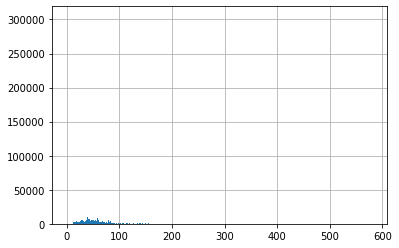

In [14]:
main_data_df['건물면적'].hist(bins=5000)

In [15]:
merge_df.shape

(1609412, 18)

In [16]:
merge_df.isna().sum()

전월세매매구분                             0
건물면적                                0
계약일                                 0
금액(만원)                              0
층                                   0
건축년도                                0
가격/면적                               0
년                                   0
월                                   0
target_log_transformed              0
target/area_log_transformed         0
건물종류                                0
지번주소                                0
도로명주소                               0
X좌표                                 2
Y좌표                                 2
주택가격지수                         272686
대지권면적                               0
dtype: int64

In [17]:
merge_df.drop(columns=['주택가격지수'], inplace=True)

In [18]:
merge_df['도로명주소'].unique()[:50]

array(['서울특별시 강남구 학동로 338-0', '서울특별시 강남구 언주로 615-0',
       '서울특별시 강남구 삼성로85길 42-0', '서울특별시 강남구 선릉로90길 56-0',
       '서울특별시 강남구 선릉로62길 38-0', '서울특별시 강남구 테헤란로64길 9-0',
       '서울특별시 강남구 테헤란로 428-0', '서울특별시 강남구 테헤란로68길 15-0',
       '서울특별시 강남구 삼성로85길 33-0', '서울특별시 강남구 언주로 118-0',
       '서울특별시 강남구 언주로30길 56-0', '서울특별시 강남구 언주로30길 57-0',
       '서울특별시 강남구 언주로30길 26-0', '서울특별시 강남구 언주로30길 10-0',
       '서울특별시 강남구 강남대로 272-0', '서울특별시 강남구 언주로30길 27-0',
       '서울특별시 강남구 언주로 122-0', '서울특별시 강남구 선릉로100길 42-0',
       '서울특별시 강남구 테헤란로63길 12-0', '서울특별시 강남구 봉은사로 516-0',
       '서울특별시 강남구 학동로82길 6-0', '서울특별시 강남구 삼성로 517-0',
       '서울특별시 강남구 봉은사로 510-0', '서울특별시 강남구 봉은사로 448-0',
       '서울특별시 강남구 언주로 427-0', '서울특별시 강남구 강남대로84길 33-0',
       '서울특별시 강남구 테헤란로4길 46-0', '서울특별시 강남구 역삼로 109-0',
       '서울특별시 강남구 강남대로 324-0', '서울특별시 강남구 언주로90길 4-0',
       '서울특별시 강남구 언주로86길 25-0', '서울특별시 강남구 선릉로87길 14-0',
       '서울특별시 강남구 언주로86길 7-0', '서울특별시 강남구 언주로86길 11-0',
       '서울특별시 강남구 테헤란로10길 10-0', '서울특별시 강남구 언주로90길

In [19]:
dong_df = merge_df[merge_df['도로명주소'].str.contains('동')]
print(dong_df.shape)
dong_df.head()

(305732, 17)


,전월세매매구분,건물면적,계약일,금액(만원),층,건축년도,가격/면적,년,월,target_log_transformed,target/area_log_transformed,건물종류,지번주소,도로명주소,X좌표,Y좌표,대지권면적
0,매매,85.76,5,56800.0,5,2007,662.313433,2013,2,10.947292,6.495739,오피스텔,서울특별시 강남구 논현동 241-1,서울특별시 강남구 학동로 338-0,959359.054275,1.946475e+06,116.15
1,매매,85.76,23,59000.0,6,2007,687.966418,2013,5,10.985293,6.533740,오피스텔,서울특별시 강남구 논현동 241-1,서울특별시 강남구 학동로 338-0,959359.054275,1.946475e+06,116.15
2,매매,85.76,3,64000.0,17,2007,746.268657,2014,4,11.066638,6.615086,오피스텔,서울특별시 강남구 논현동 241-1,서울특별시 강남구 학동로 338-0,959359.054275,1.946475e+06,116.15
3,매매,85.76,9,64000.0,16,2007,746.268657,2014,4,11.066638,6.615086,오피스텔,서울특별시 강남구 논현동 241-1,서울특별시 강남구 학동로 338-0,959359.054275,1.946475e+06,116.15
4,매매,85.76,4,62000.0,8,2007,722.947761,2014,9,11.034890,6.583337,오피스텔,서울특별시 강남구 논현동 241-1,서울특별시 강남구 학동로 338-0,959359.054275,1.946475e+06,116.15


In [20]:
dong_df['dong'] = dong_df['도로명주소'].apply(lambda x: x.split(' ')[2])

c:\users\max6296\ml\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [22]:
dong_df['dong'].nunique()

2189

In [29]:
dong_df['dong2'] = dong_df['dong'].apply(lambda x: x.replace('0','').replace('1','').replace('2','').replace('3','')\
                                       .replace('4','').replace('5','').replace('6','').replace('7','').replace('8','')\
                                       .replace('9','').replace('길','').replace('가',''))

c:\users\max6296\ml\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [30]:
dong_df['dong2'].nunique()

353

In [31]:
dong_df['dong2'].unique()

array(['학동로', '고덕로', '천호대로', '진황도로', '천중로', '성안로', '양재대로', '강동대로', '올림픽로',
       '개화동로', '동일로', '능동로', '연동로', '사정로', '황물로', '청계천로', '왕산로', '이문로',
       '답십리로', '장한로', '장한로다', '장한로나', '한천로', '장안벚꽃로', '답십리로나', '서울시립대로',
       '전농로', '왕산로라', '망우로', '노량진로', '국사봉', '신대방', '보라매로', '서달로', '동광로',
       '왕십리로', '동소문로', '동소문로나', '목동서로', '목동동로', '목동중앙본로', '목동중앙서로',
       '목동중앙남로', '여의동로', '동일로나', '신림동나', '신이문로', '상도로', '매봉로', '목동중앙북로',
       '목동중앙남로나', '목동중앙북로나', '구로동로', '영동대로', '상일로', '아리수로', '동남로', '명일로',
       '풍성로', '명일로나', '구천면로', '암사', '상암로', '천호대로다', '천호대로나', '성내로',
       '양재대로나', '천호대로라', '천호옛', '성내로다', '성내로나', '고덕로라', '고덕로마', '고덕로나',
       '선사로', '구천면로나', '고덕로다', '진황도로라', '성안로다', '상암로나', '천중로나', '성안로나',
       '성안로라', '성안로마', '진황도로다', '개화동로나', '방화동로', '방화동로나', '신림동', '동일로다',
       '능동로나', '동일로라', '능동로다', '구로동로나', '구로동로다', '동일로바', '동일로마', '답십리로라',
       '한천로다', '무학로', '왕산로나', '무학로다', '고산자로', '안암로', '외대역동로', '휘경로',
       '휘경로나', '화랑로', '화랑로마', '천장산로', '이문로마', '이문로사', '이문로바', '이

In [32]:
dong_df['endswithdong'] = dong_df['dong'].apply(lambda x: 1 if x.endswith('동') else 0)

c:\users\max6296\ml\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [33]:
dong_df['endswithdong'].value_counts()

0    305732
Name: endswithdong, dtype: int64

In [34]:
merge_df.to_csv('./prepped_data/대지권면적적용_메인데이터.csv', index=False)